## Parameters


In [7]:
import numpy as np

timestep = 1e-17
gamma = 1e13
P = 10

initial_position = np.linspace(2,2,P)
initial_velocities = np.zeros(P)# np.linspace(0,0,100)


iterations = 2000000

## Verlet

In [ ]:
from verlet import verlet
from dynamics import energy
import matplotlib.pyplot as plt
from dynamics import k_B, T_0

position, velocity = verlet(
    inital_positions=initial_position,
    initial_velocities=initial_velocities,
    iterations=iterations,
    timestep=timestep,
    gamma=gamma,
    termostat=True,
)

positions = np.array(position).transpose()[0]
velocities = np.array(velocity).transpose()[0]


 61%|█████████████████████████████████████████████████████████████████                                         | 1227534/1999997 [00:53<00:33, 23058.25it/s]

## Energy

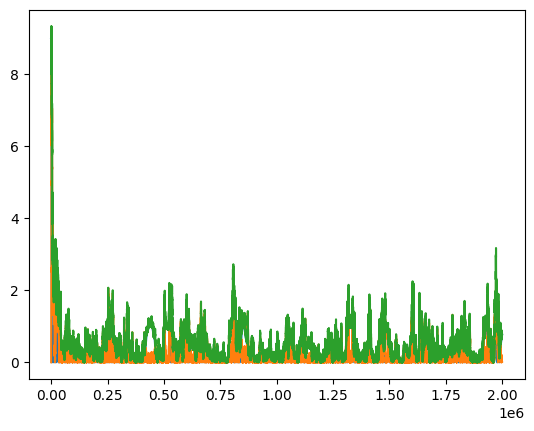

Energie totale moyenne:  0.5210132687756575
Ecart type:  116.396922786548


In [4]:
potential_e, kinetic_e = energy(positions, velocities)

energy_totale = potential_e + kinetic_e
plt.plot(potential_e)
plt.plot(kinetic_e)
plt.plot(energy_totale)

plt.show()

print('Energie totale moyenne: ', np.mean(energy_totale))
print('Ecart type: ', np.std(energy_totale, ddof=1) * 100 / np.mean(energy_totale))

2000000
Energie cinétique moyenne:  0.248777152332605
0.2
gamma 10000000000000.0


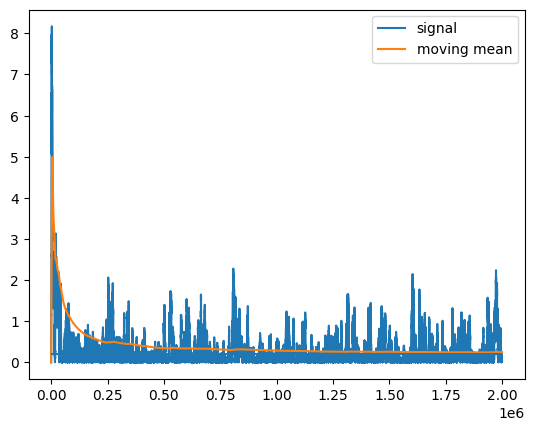

In [6]:
plt.plot(kinetic_e, label="signal")

kinetic_cumsum = np.cumsum(kinetic_e)
iteration = np.arange(1,len(kinetic_e)+1,1)
print(iterations)
kinetic_mean = kinetic_cumsum / iteration

ax = plt.plot(kinetic_mean, label="moving mean")
print("Energie cinétique moyenne: ", np.mean(kinetic_e))
print(0.5 * k_B * T_0)

print("gamma", gamma)
plt.legend()

plt.hlines(y=0.2, xmin=0, xmax=iterations)
plt.show()

IndexError: invalid index to scalar variable.

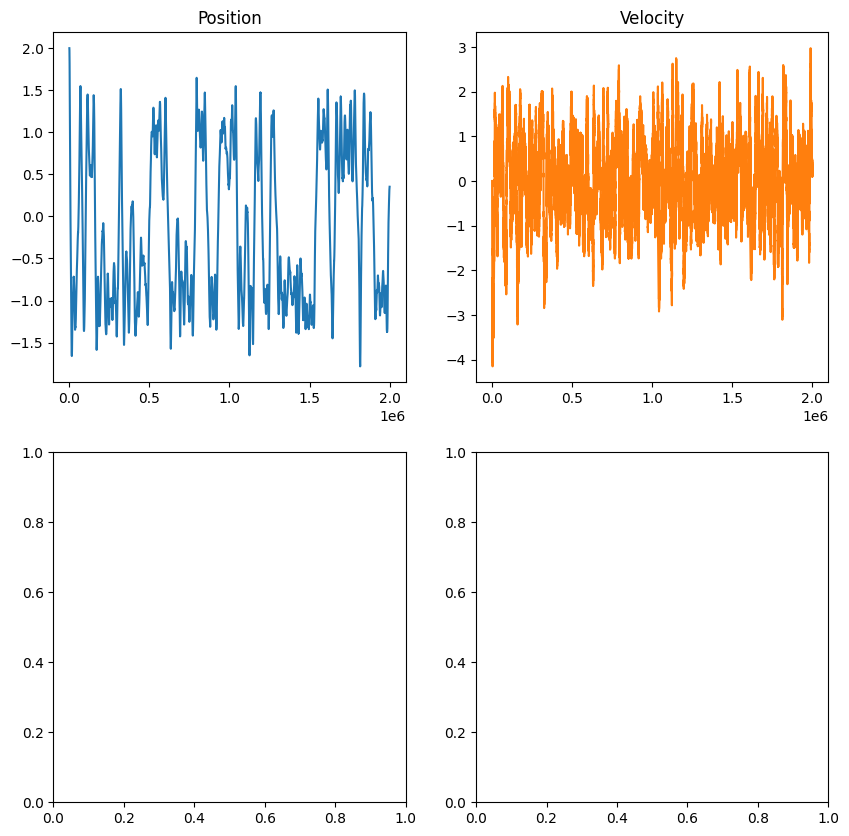

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot([k[0] for k in position])
axs[0, 0].set_title('Position')
axs[0, 1].plot([k[0] for k in velocity], 'tab:orange')
axs[0, 1].set_title('Velocity')
axs[1, 0].plot([k[0] for k in energy_totale], 'tab:green')
#axs[1, 0].set_title('Energy')
axs[1, 0].plot([k[0] for k in potential_e], 'tab:red')
#axs[1, 0].set_title('Potential Energy')
axs[1, 0].plot([k[0] for k in kinetic_e], 'tab:blue')
axs[1, 0].set_title('Energy')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()


#print(np.mean(energy))
print(0.5 * k_B * T)